In [4]:
import os
from datetime import date, timedelta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from dateutil.relativedelta import relativedelta

## GSWP3 VS BOOI4

In [6]:
mypath = "/glade/scratch/jinmuluo/CLM_GSWP3_SP_subset_data/datmdata"
gswp3 = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]
gswp3.remove("domain.lnd.360x720_gswp3.0v1_isu_point_c230824.nc")
gswp3_namelist = [os.path.join(mypath, f) for f in gswp3]
dsGSWP3 = xr.open_mfdataset(gswp3_namelist)

In [7]:
mypath2 = "/glade/scratch/jinmuluo/MESOCOM_fluxtower_BOOI4/datmdata"
booi4 = [f for f in os.listdir(mypath2) if os.path.isfile(os.path.join(mypath2, f))]
booi4.remove("domain.lnd.360x720_gswp3.0v1_isu_point_c230817.nc")
booi4_namelist = [os.path.join(mypath2, f) for f in booi4]
dsBOOI4 = xr.open_mfdataset(booi4_namelist)

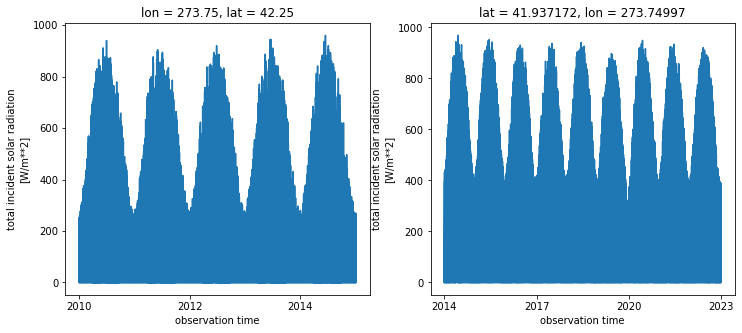

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
dsGSWP3.FSDS.fillna(0).plot(ax=axs[0], x="time")
dsBOOI4.FSDS.sel(time=slice("2014-01-01", "2022-12-31")).plot(ax=axs[1], x="time")

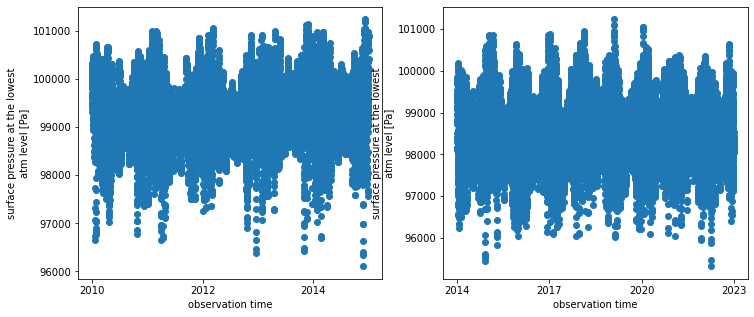

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# dsGSWP3.PSRF.fillna(0).plot(ax=axs[0], x='time')
dsGSWP3.plot.scatter(ax=axs[0], x="time", y="PSRF")
dsBOOI4.plot.scatter(ax=axs[1], x="time", y="PSRF")

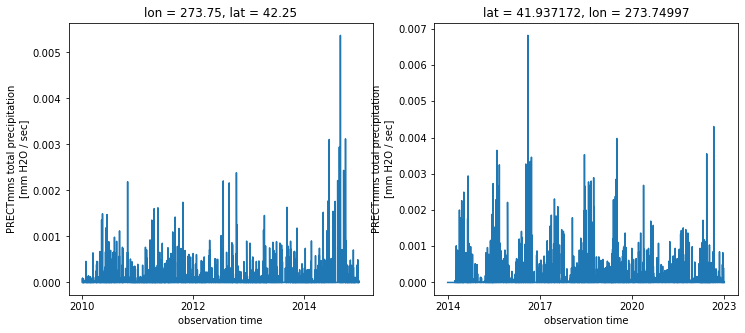

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
dsGSWP3.PRECTmms.fillna(0).plot(ax=axs[0], x="time")
dsBOOI4.PRECTmms.plot(ax=axs[1], x="time")

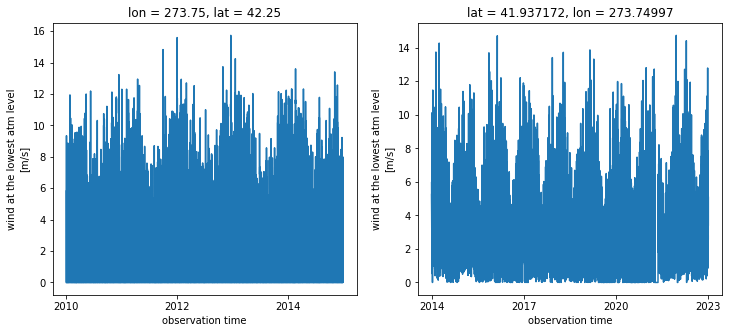

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
dsGSWP3.WIND.fillna(0).plot(ax=axs[0], x="time")
dsBOOI4.WIND.plot(ax=axs[1], x="time")

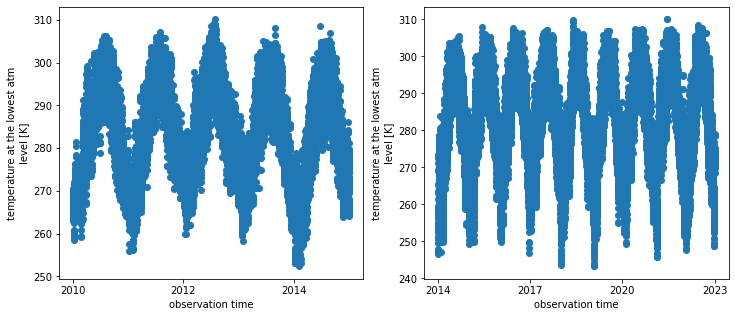

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
dsGSWP3.plot.scatter(ax=axs[0], x="time", y="TBOT")
dsBOOI4.plot.scatter(ax=axs[1], x="time", y="TBOT")

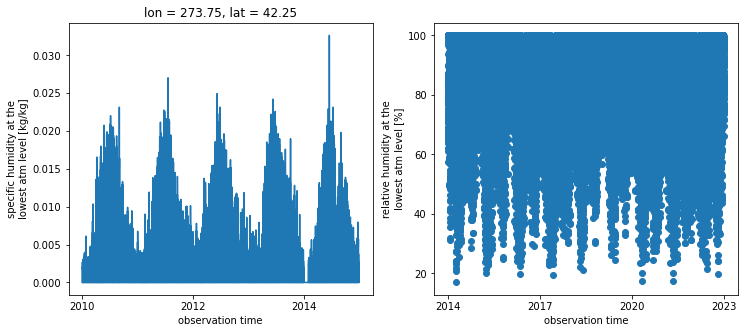

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
dsGSWP3.QBOT.fillna(0).plot(ax=axs[0], x="time")
dsBOOI4.plot.scatter(ax=axs[1], x="time", y="RH")